# Financial News Sentiment Analysis - EDA

## Task 1: Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Set plot style
sns.set_theme()
sns.set_palette('husl')

# List of tickers and their file paths
tickers = ['AAPL', 'AMZN', 'GOOG', 'NVDA', 'TSLA', 'META']
file_paths = [
     r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\AAPL_historical_data.csv',
    r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\AMZN_historical_data.csv',
    r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\GOOG_historical_data.csv',
    r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\META_historical_data.csv',
    r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\NVDA_historical_data.csv',
    r'C:\Users\hp\Downloads\Telegram Desktop\10Academy-Week1-FNSPID\data\TSLA_historical_data.csv'
]

# Combine all stock data into one DataFrame
dfs = []
for ticker, path in zip(tickers, file_paths):
    temp_df = pd.read_csv(path)
    temp_df['ticker'] = ticker
    dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)

# Analyst ratings
Ddf = pd.read_csv('C:/Users/hp/Downloads/Telegram Desktop/10Academy-Week1-FNSPID/data/raw_analyst_ratings.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_2932\3763819147.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', infer_datetime_format=True)


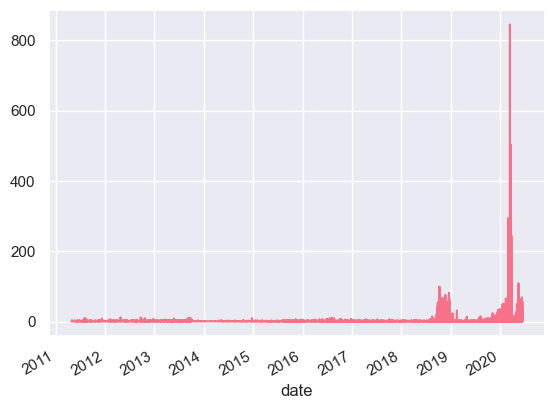

In [11]:
news_df = pd.read_csv('C:/Users/hp/Downloads/Telegram Desktop/10Academy-Week1-FNSPID/data/raw_analyst_ratings.csv')

news_df['headline_length'] = news_df['headline'].str.len()
print(news_df['headline_length'].describe())
print(news_df['publisher'].value_counts())
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', infer_datetime_format=True)
news_df['date'] = news_df['date'].dt.tz_localize(None)  # Make all datetimes offset-naive
news_df['date'].value_counts().sort_index().plot()
plt.show()

In [12]:
df.info()
df.head()
df['ticker'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35756 entries, 0 to 35755
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          35756 non-null  object 
 1   Open          35756 non-null  float64
 2   High          35756 non-null  float64
 3   Low           35756 non-null  float64
 4   Close         35756 non-null  float64
 5   Adj Close     35756 non-null  float64
 6   Volume        35756 non-null  int64  
 7   Dividends     35756 non-null  float64
 8   Stock Splits  35756 non-null  float64
 9   ticker        35756 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.7+ MB


ticker
AAPL    10998
AMZN     6846
TSLA     6421
GOOG     5020
META     3545
NVDA     2926
Name: count, dtype: int64

In [13]:
plt.style.use('seaborn-v0_8')

In [14]:
sns.set_theme()

In [15]:
# ...existing code...
# Set plot style
sns.set_theme()
sns.set_palette('husl')
# ...existing code...

In [16]:
# ...existing code...
# Set plot style
sns.set_theme()
sns.set_palette('husl')
# ...existing code...

In [17]:
# ...existing code...
# Set plot style
sns.set_theme()
sns.set_palette('husl')
# ...existing code...

In [1]:
from textblob import TextBlob
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

ModuleNotFoundError: No module named 'textblob'